In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pylab
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score, KFold
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

In [2]:
# import data

df = pd.read_csv("/Users/idaba/OneDrive/Desktop/BANA 698/Data.csv")

In [3]:
# get column names

df.columns

Index(['CountryID', 'Year', 'CountryName', 'Region', 'IncomeLevel', 'FDINet',
       'FDIInflowstoGDP', 'FDIInflows', 'FDIOutflowsPercent', 'FDIOutflows',
       'GDP', 'GDPGrowth', 'GrossNationalSpending', 'InflationConsumerPrices',
       'InflationRate', 'InflationPercent', 'GoodsNetTrade',
       'GoodsandServicesNetTrade', 'TradePercent', 'ServicesTradedPercent',
       'GovernmentSpendingToGDP', 'GovernmentSpendingAnnualGrowth',
       'GovernmentSpending', 'GovernmentEducationSpendingToGDP',
       'GovernmentEducationSpendingToTotalSpending',
       'GovernmentMilitarySpendingToGDP',
       'GovernmentMilitarySpendingToTotalSpending',
       'GovernmentMilitarySpending', 'ElectricityAccess',
       'AgriculturalCarbonDioxide', 'TransportCarbonDioxide',
       'WasteCarbonDioxide', 'ForestArea', 'RenewableEnergyConsumption',
       'TotalGreenhouseGas', 'LongTermExternalDebt', 'TotalPSD', 'LongTermPSD',
       'ShortTermPSD', 'InterestPaymentsPercent', 'ExternalDebt', 'TotalDebt

In [4]:
# rename columns

df.rename(columns={'FDIOutflowsPercent': 'FDIOutflowsToGDP', 'FDIInflowstoGDP': 'FDIInflowsToGDP'}, inplace=True)

In [5]:
# see the shape

df.shape

(651, 59)

In [6]:
# remove unwanted column

df = df.drop(['GrossNationalSpending', 'InflationConsumerPrices',
       'GoodsNetTrade', 'GoodsandServicesNetTrade', 'TradePercent', 'ServicesTradedPercent',
       'ElectricityAccess','AgriculturalCarbonDioxide', 'TransportCarbonDioxide',
       'WasteCarbonDioxide', 'ForestArea', 'RenewableEnergyConsumption',
       'TotalGreenhouseGas', 'LongTermExternalDebt', 'TotalPSD', 'LongTermPSD',
       'ShortTermPSD', 'InterestPaymentsPercent', 'ExternalDebt', 'TotalDebt',
       'FemaleLifeExpectancy', 'MaleLifeExpectancy','AdultLiteracyRate', 
       'YouthLiteracyRate', 'BasicDrinkingWater','SafelyManagedDrinkingWater',
       'BasicHandwashing', 'PovertyRatio', 'NationalPovertyRatio', 'SocialPovertyRatio',
       'UnemploymentwithAdvancedEducation', 'UnemploymentwithBasicEducation',
       'UnemploymentWithintermediateEducation', 'TotalUnemployment',
       'YouthUnemployment', 'ExchangeRate'], axis =1)

In [7]:
# get column names

df.columns

Index(['CountryID', 'Year', 'CountryName', 'Region', 'IncomeLevel', 'FDINet',
       'FDIInflowsToGDP', 'FDIInflows', 'FDIOutflowsToGDP', 'FDIOutflows',
       'GDP', 'GDPGrowth', 'InflationRate', 'InflationPercent',
       'GovernmentSpendingToGDP', 'GovernmentSpendingAnnualGrowth',
       'GovernmentSpending', 'GovernmentEducationSpendingToGDP',
       'GovernmentEducationSpendingToTotalSpending',
       'GovernmentMilitarySpendingToGDP',
       'GovernmentMilitarySpendingToTotalSpending',
       'GovernmentMilitarySpending', 'TotalLifeExpectancy'],
      dtype='object')

In [8]:
# see the shape

df.shape

(651, 23)

In [9]:
# see statistics 

df.describe().round()

,Year,FDINet,FDIInflowsToGDP,FDIInflows,FDIOutflowsToGDP,FDIOutflows,GDP,GDPGrowth,InflationRate,InflationPercent,GovernmentSpendingToGDP,GovernmentSpendingAnnualGrowth,GovernmentSpending,GovernmentEducationSpendingToGDP,GovernmentEducationSpendingToTotalSpending,GovernmentMilitarySpendingToGDP,GovernmentMilitarySpendingToTotalSpending,GovernmentMilitarySpending,TotalLifeExpectancy
count,651.0,5.080000e+02,540.0,5.510000e+02,500.0,5.110000e+02,6.090000e+02,610.0,608.0,608.0,490.0,468.0,4.880000e+02,366.0,349.0,448.0,444.0,4.510000e+02,419.0
mean,2022.0,1.831873e+09,4.0,9.259408e+09,2.0,1.120022e+10,4.955280e+11,4.0,13.0,13.0,16.0,3.0,2.163479e+10,4.0,12.0,2.0,6.0,3.991834e+09,72.0
std,1.0,2.839158e+10,29.0,4.560999e+10,27.0,4.888731e+10,2.271615e+12,6.0,46.0,46.0,9.0,10.0,8.728420e+10,2.0,6.0,2.0,6.0,1.781298e+10,8.0
min,2021.0,-1.650000e+11,-360.0,-3.090000e+11,-360.0,-3.320000e+11,5.906598e+07,-29.0,-21.0,-21.0,1.0,-76.0,4.400000e+01,0.0,1.0,0.0,0.0,7.920000e+02,53.0
25%,2021.0,-2.442444e+09,1.0,7.749717e+07,0.0,1.689923e+06,8.342244e+09,2.0,3.0,3.0,11.0,0.0,1.184661e+08,3.0,9.0,1.0,3.0,1.671916e+07,66.0
50%,2022.0,-5.379498e+08,2.0,8.004435e+08,0.0,8.737283e+07,3.388693e+10,4.0,6.0,6.0,16.0,2.0,8.590246e+08,4.0,13.0,2.0,5.0,1.715874e+08,73.0
75%,2023.0,-2.142594e+07,5.0,5.555248e+09,1.0,2.395132e+09,2.460000e+11,6.0,10.0,10.0,20.0,5.0,6.146192e+09,5.0,16.0,2.0,8.0,8.478140e+08,78.0
max,2023.0,1.780000e+11,434.0,4.760000e+11,349.0,4.540000e+11,2.770000e+13,75.0,922.0,922.0,62.0,142.0,9.424600e+11,14.0,33.0,37.0,58.0,2.964390e+11,86.0


In [10]:
# look for null values

df.isna().sum()

CountryID                                       0
Year                                            0
CountryName                                     0
Region                                          0
IncomeLevel                                     3
FDINet                                        143
FDIInflowsToGDP                               111
FDIInflows                                    100
FDIOutflowsToGDP                              151
FDIOutflows                                   140
GDP                                            42
GDPGrowth                                      41
InflationRate                                  43
InflationPercent                               43
GovernmentSpendingToGDP                       161
GovernmentSpendingAnnualGrowth                183
GovernmentSpending                            163
GovernmentEducationSpendingToGDP              285
GovernmentEducationSpendingToTotalSpending    302
GovernmentMilitarySpendingToGDP               203


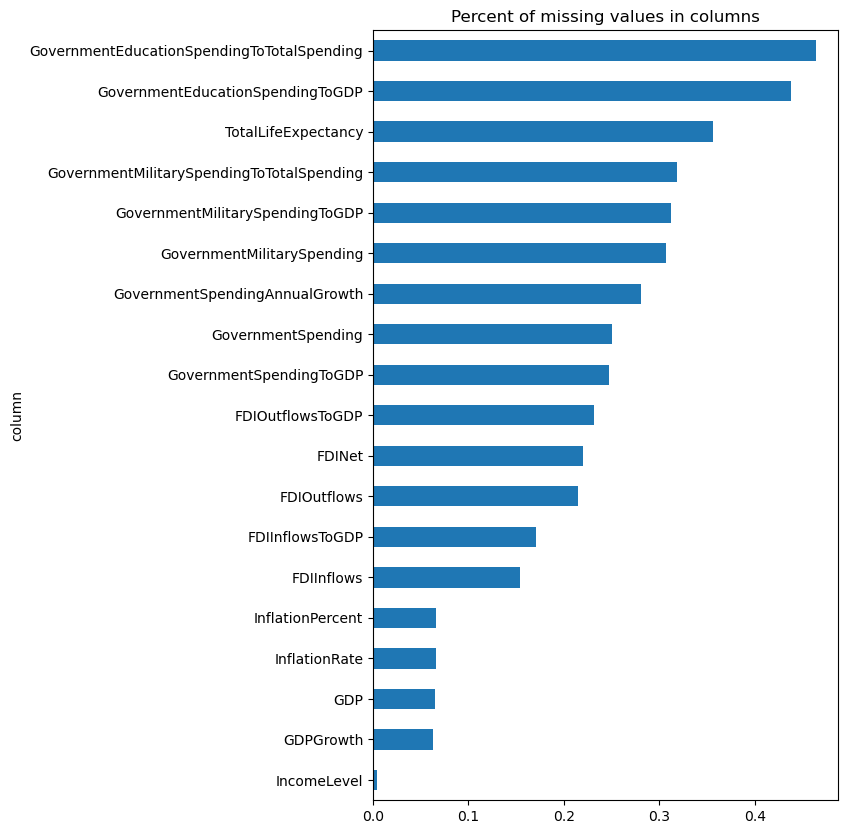

In [11]:
# visualize null values

def plot_missing_values(df):
    data = [(col, df[col].isnull().sum() / len(df)) 
            for col in df.columns if df[col].isnull().sum() > 0]
    col_names = ['column', 'percent_missing']
    missing_df = pd.DataFrame(data, columns=col_names).sort_values('percent_missing')
    pylab.rcParams['figure.figsize'] = (6, 10)
    missing_df.plot(kind='barh', x='column', y='percent_missing', legend=False)  # Set legend to False
    plt.title('Percent of missing values in columns')
plot_missing_values(df)


In [12]:
# see the data type for each field

df.dtypes

CountryID                                      object
Year                                            int64
CountryName                                    object
Region                                         object
IncomeLevel                                    object
FDINet                                        float64
FDIInflowsToGDP                               float64
FDIInflows                                    float64
FDIOutflowsToGDP                              float64
FDIOutflows                                   float64
GDP                                           float64
GDPGrowth                                     float64
InflationRate                                 float64
InflationPercent                              float64
GovernmentSpendingToGDP                       float64
GovernmentSpendingAnnualGrowth                float64
GovernmentSpending                            float64
GovernmentEducationSpendingToGDP              float64
GovernmentEducationSpendingT

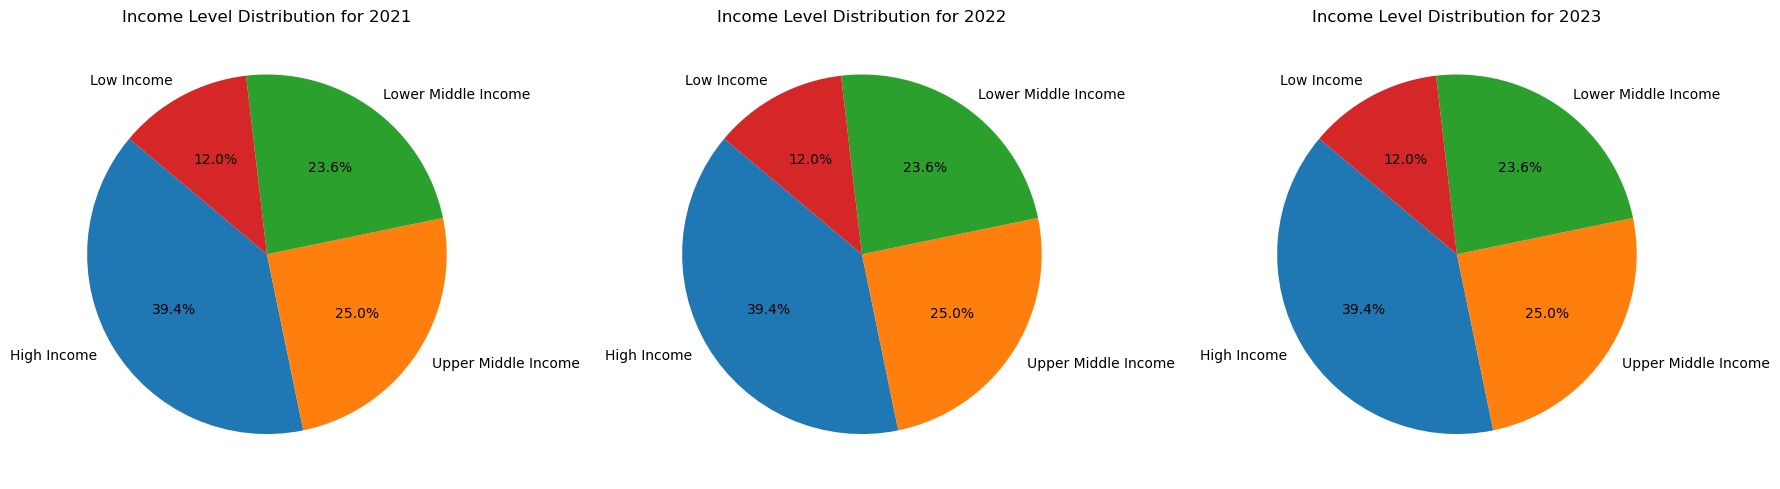

In [13]:
# income level for years 2021, 2022, 2023

label_mapping = {
    'Low income': 'Low Income',
    'Lower middle income': 'Lower Middle Income',
    'Upper middle income': 'Upper Middle Income',
    'High income': 'High Income'
}

df['IncomeLevel'] = df['IncomeLevel'].map(label_mapping)  
df21 = df[df['Year'] == 2021]
df22 = df[df['Year'] == 2022]
df23 = df[df['Year'] == 2023]

def plot_pie_chart(ax, data, year):
    income_levels = data['IncomeLevel'].value_counts()
    ax.pie(income_levels, labels=income_levels.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Income Level Distribution for {year}')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plot_pie_chart(axs[0], df21, 2021)
plot_pie_chart(axs[1], df22, 2022)
plot_pie_chart(axs[2], df23, 2023)
plt.tight_layout()
plt.show()


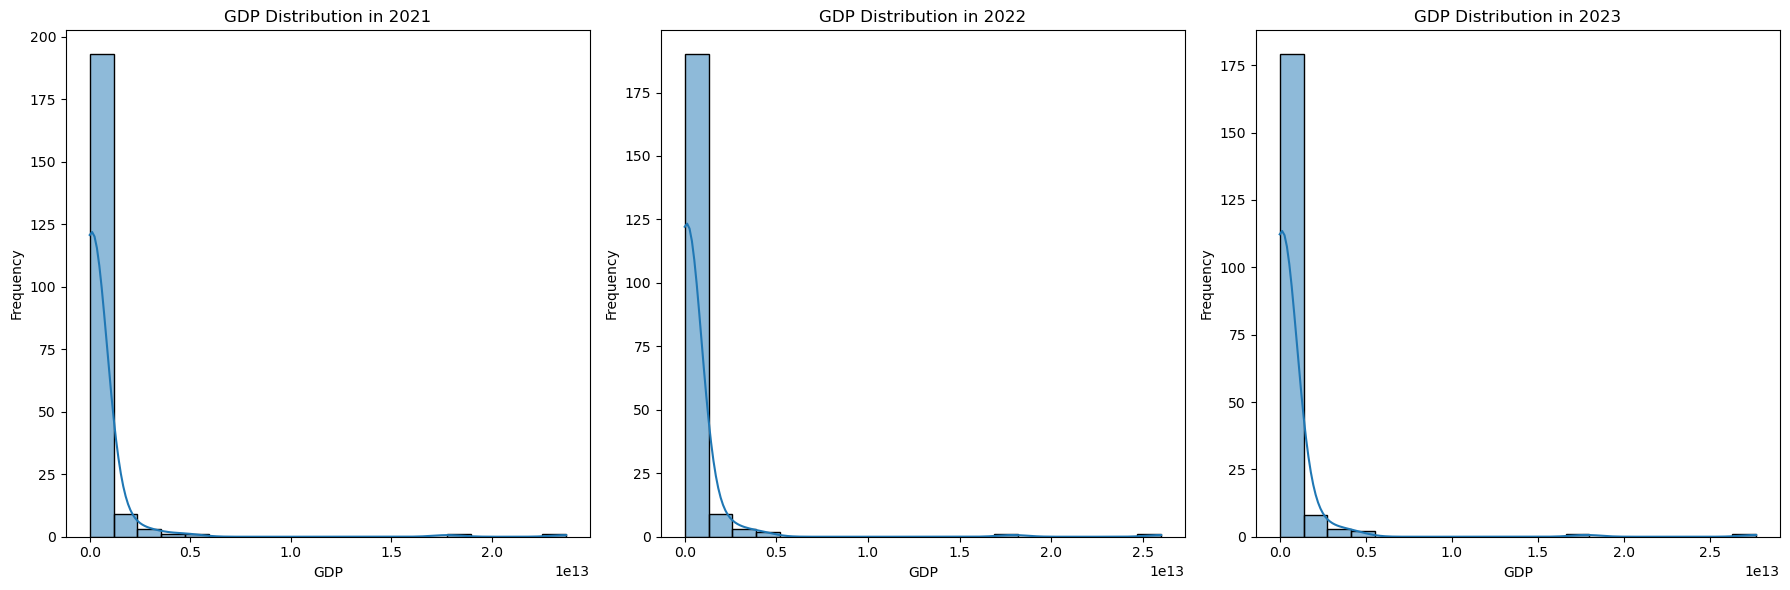

In [14]:
# GDP distribution for the years 2021, 2022, and 2023

df21 = df[df['Year'] == 2021]
df22 = df[df['Year'] == 2022]
df23 = df[df['Year'] == 2023]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df21['GDP'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('GDP Distribution in 2021')
axs[0].set_xlabel('GDP')
axs[0].set_ylabel('Frequency')

sns.histplot(df22['GDP'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('GDP Distribution in 2022')
axs[1].set_xlabel('GDP')
axs[1].set_ylabel('Frequency')

sns.histplot(df23['GDP'], bins=20, kde=True, ax=axs[2])
axs[2].set_title('GDP Distribution in 2023')
axs[2].set_xlabel('GDP')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

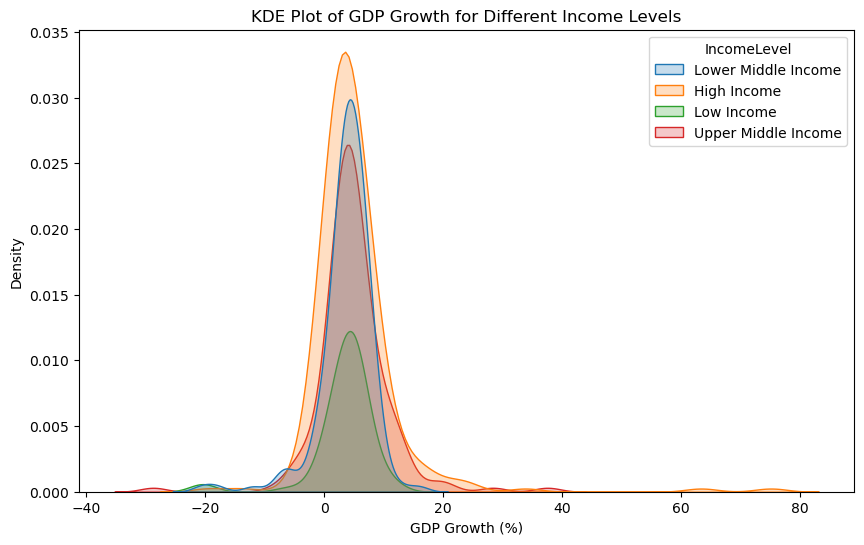

In [15]:
# GDP growth for different income levels
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='GDPGrowth', hue='IncomeLevel', fill=True)
plt.title('KDE Plot of GDP Growth for Different Income Levels')
plt.xlabel('GDP Growth (%)')
plt.ylabel('Density')
plt.show()

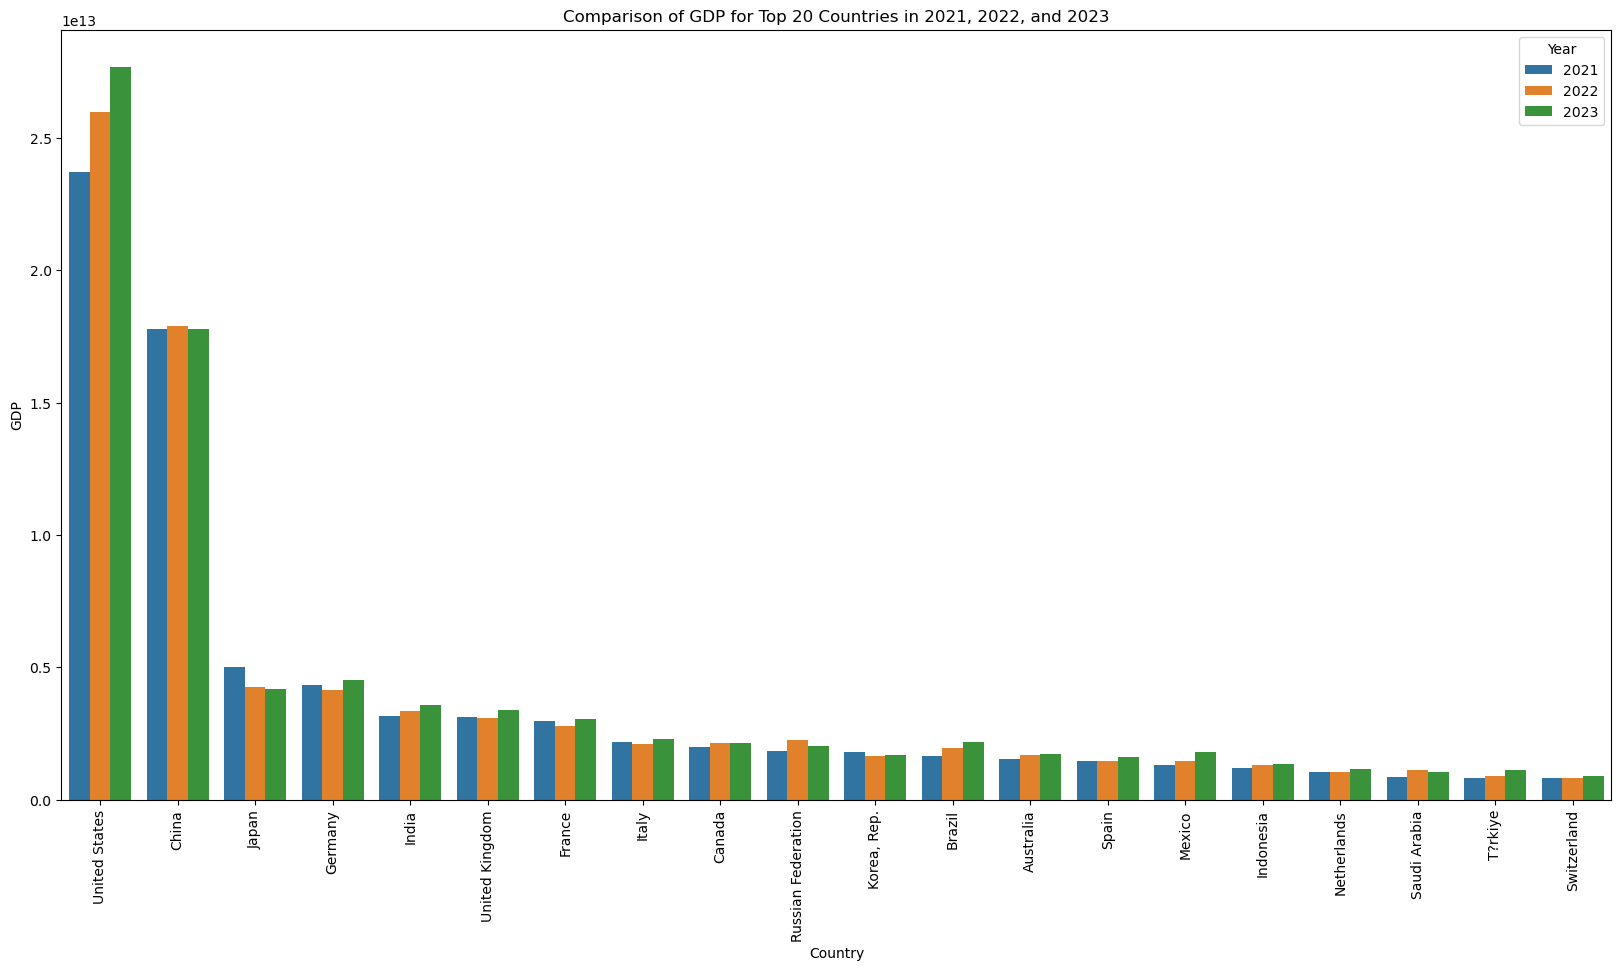

In [16]:
# change of GDP for top 20 countries from 2021 to 2023

df21 = df[df['Year'] == 2021]
df22 = df[df['Year'] == 2022]
df23 = df[df['Year'] == 2023]
top20_gdp_2021 = df21.sort_values(by='GDP', ascending=False).head(20)
top20_gdp_2022 = df22.sort_values(by='GDP', ascending=False).head(20)
top20_gdp_2023 = df23.sort_values(by='GDP', ascending=False).head(20)
top20_gdp_2021['Year'] = 2021
top20_gdp_2022['Year'] = 2022
top20_gdp_2023['Year'] = 2023
combined_gdp = pd.concat([top20_gdp_2021, top20_gdp_2022, top20_gdp_2023])
plt.figure(figsize=(20, 10))
sns.barplot(x='CountryName', y='GDP', hue='Year', data=combined_gdp)
plt.xticks(rotation=90)
plt.title('Comparison of GDP for Top 20 Countries in 2021, 2022, and 2023')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.legend(title='Year')
plt.show()

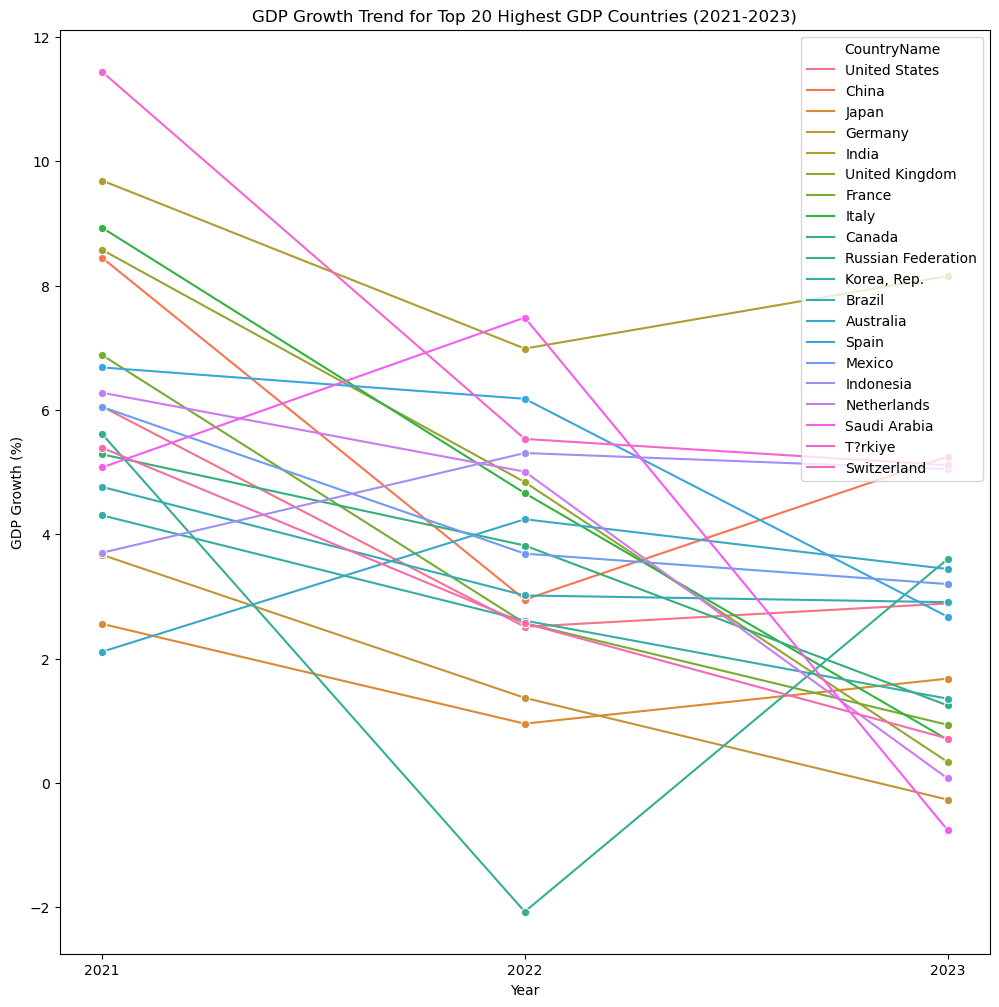

In [17]:
# the GDP growth trend for top 20 countries from 2021 to 2023

top20_gdp_2022['Year'] = 2022
top20_gdp_2023['Year'] = 2023

combined_gdp_growth = pd.concat([top20_gdp_2021[['CountryName', 'Year', 'GDPGrowth']],
                                 top20_gdp_2022[['CountryName', 'Year', 'GDPGrowth']],
                                 top20_gdp_2023[['CountryName', 'Year', 'GDPGrowth']]])


plt.figure(figsize=(12, 12))
sns.lineplot(data=combined_gdp_growth, x='Year', y='GDPGrowth', hue='CountryName', marker='o')

# Customize the x-axis to only show 2021, 2022, and 2023
plt.xticks([2021, 2022, 2023])

plt.title('GDP Growth Trend for Top 20 Highest GDP Countries (2021-2023)')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.show()

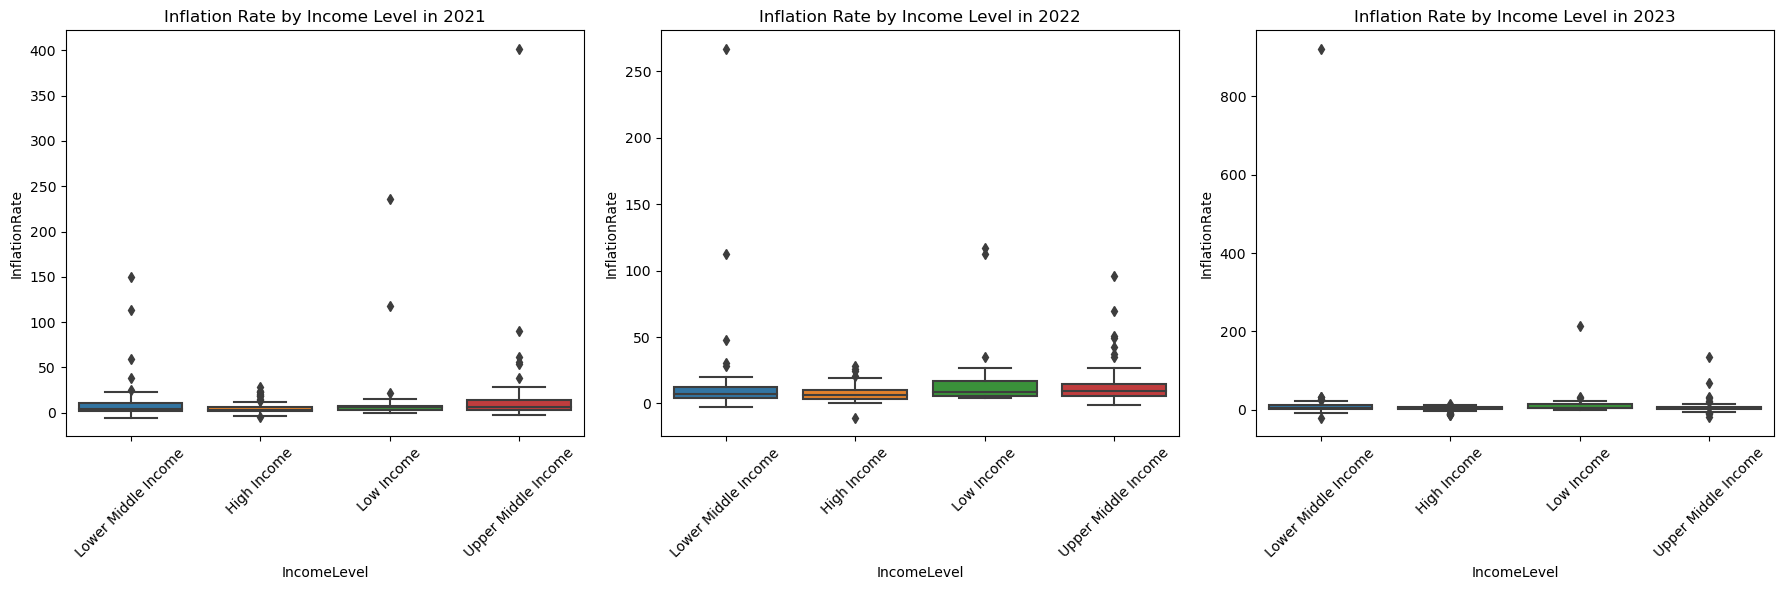

In [18]:
# inflation rate for different income levels

df21 = df[df['Year'] == 2021]
df22 = df[df['Year'] == 2022]
df23 = df[df['Year'] == 2023]

combined_df = pd.concat([df21, df22, df23])

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df21, x='IncomeLevel', y='InflationRate')
plt.title('Inflation Rate by Income Level in 2021')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(data=df22, x='IncomeLevel', y='InflationRate')
plt.title('Inflation Rate by Income Level in 2022')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(data=df23, x='IncomeLevel', y='InflationRate')
plt.title('Inflation Rate by Income Level in 2023')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

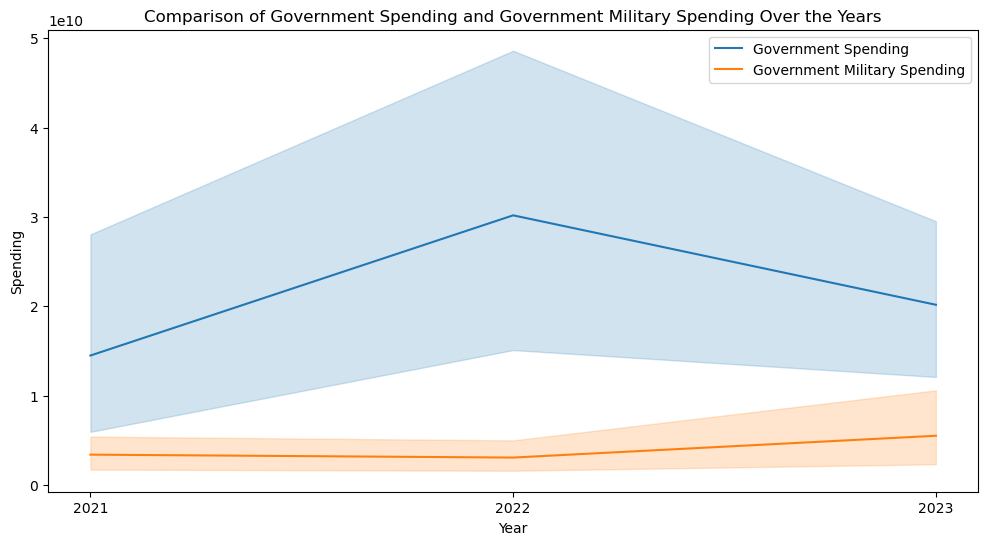

In [19]:
# military spending vs total government spending

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='GovernmentSpending', label='Government Spending')
sns.lineplot(data=df, x='Year', y='GovernmentMilitarySpending', label='Government Military Spending')
plt.title('Comparison of Government Spending and Government Military Spending Over the Years')
plt.xlabel('Year')
plt.ylabel('Spending')
plt.legend()
plt.xticks([2021, 2022, 2023])
plt.show()

c:\Users\idaba\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


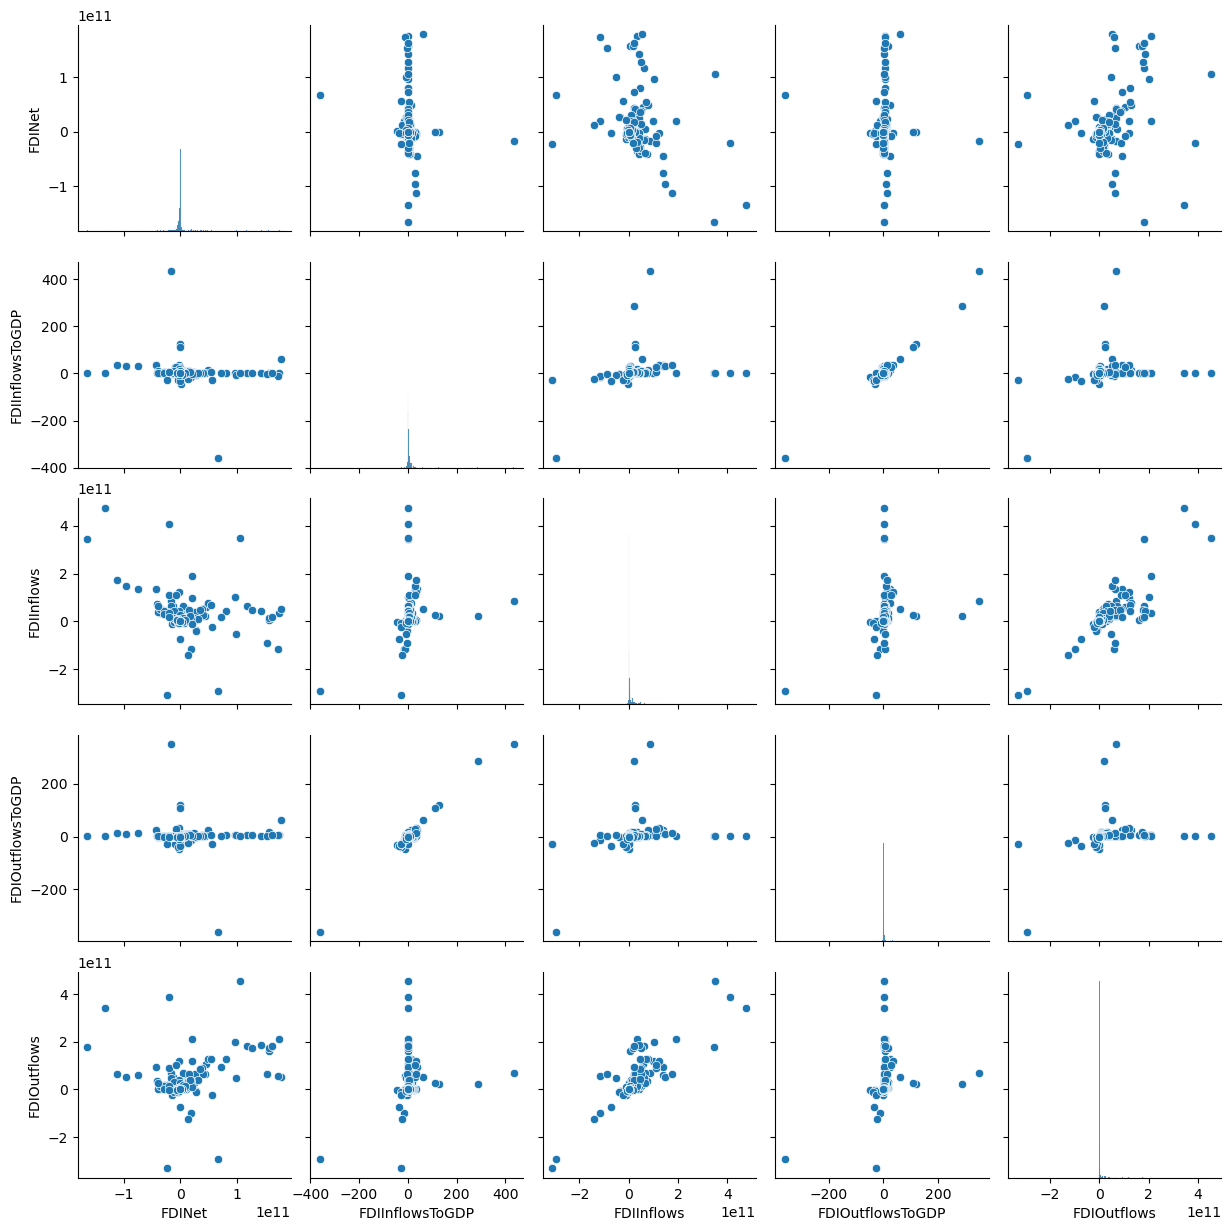

In [20]:
# government spending

ForienInvestment = df.loc[:,['FDINet','FDIInflowsToGDP', 'FDIInflows', 'FDIOutflowsToGDP', 'FDIOutflows']]

sns.pairplot(data=ForienInvestment)


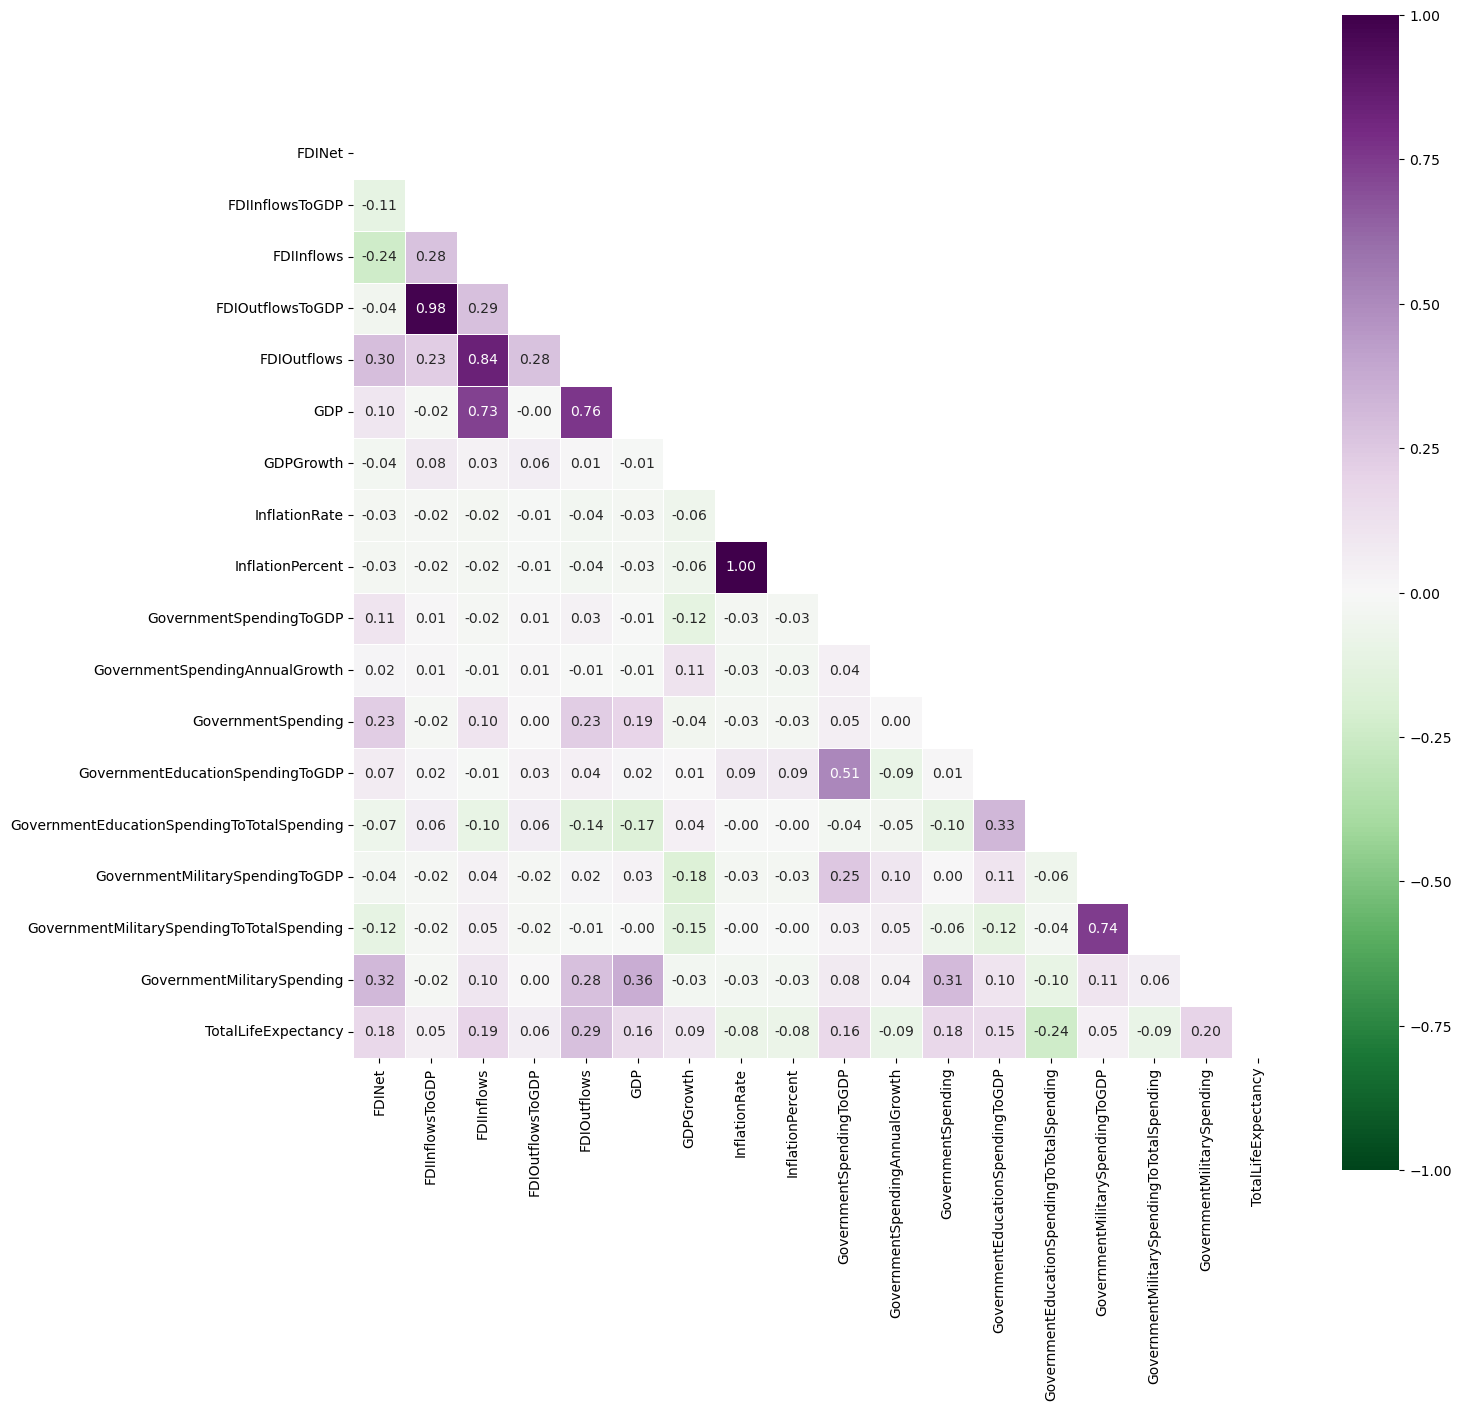

In [21]:
# create heatmap for numeric variables

num_df = df.drop(['CountryID', 'Year', 'CountryName', 'Region', 'IncomeLevel'], axis =1)
coco = num_df.corr()
tri_matrix = np.triu(coco)
plt.figure(figsize=(15, 15))
sns.heatmap(coco, square=True, linewidth=0.5, vmin=-1, vmax=1, cmap='PRGn_r', mask=tri_matrix, annot=True, fmt='.2f')
plt.show()

In [22]:
# drop the column with the highest correlation

df = df.drop(['InflationPercent'], axis =1)

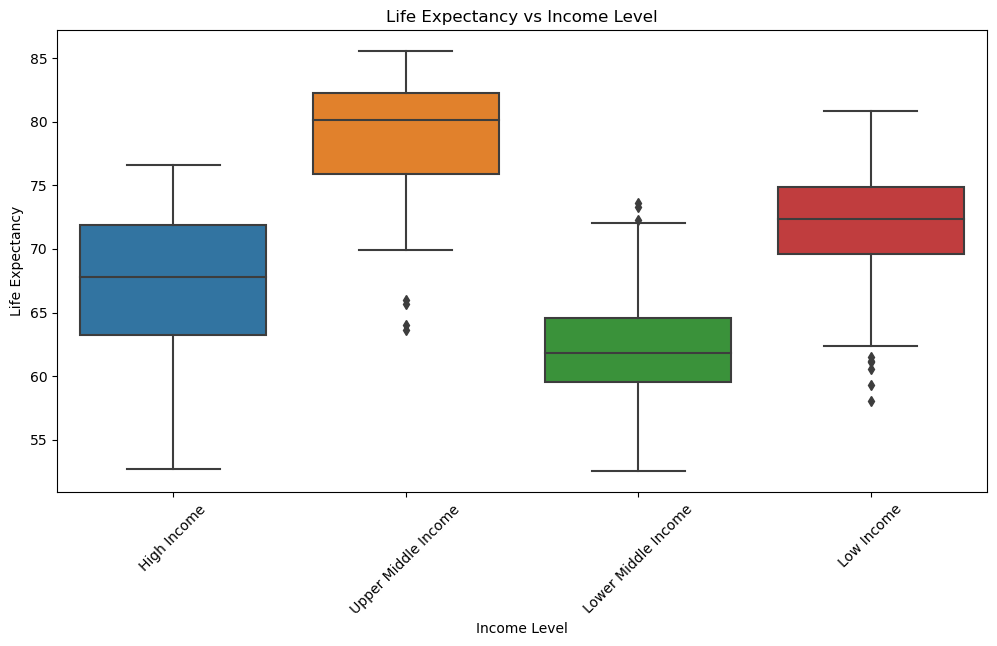

In [23]:
# income level vs life expectancy

new_labels = ['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='IncomeLevel', y='TotalLifeExpectancy')
plt.title('Life Expectancy vs Income Level')
plt.xlabel('Income Level')
plt.ylabel('Life Expectancy')  
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45)
plt.show()


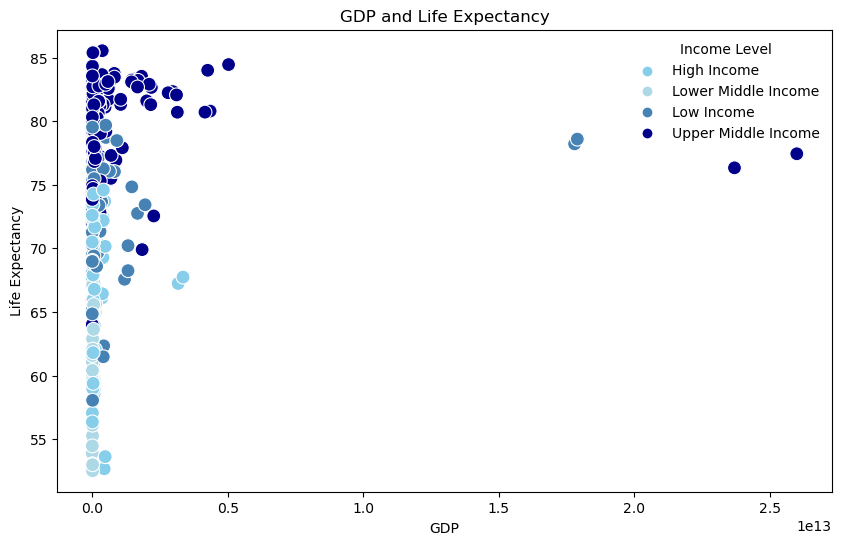

In [24]:
# scotterplot of GDP and life expectancy

custom_palette = {
    'Low Income': '#ADD8E6',  
    'Lower Middle Income': '#87CEEB', 
    'Upper Middle Income': '#4682B4',  
    'High Income': '#00008B'  
}

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='GDP',
    y='TotalLifeExpectancy',
    hue='IncomeLevel',
    palette=custom_palette,
    s=100
)


handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income']
new_order = [0, 2, 3, 1]  
plt.legend(
    [handles[i] for i in new_order],
    [new_labels[i] for i in new_order],
    title='Income Level',
    frameon=False
)

plt.title('GDP and Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()


In [25]:
# drop the TotalLifeExpectancy column (not needed for the models)

df = df.drop(['TotalLifeExpectancy'], axis =1)

In [26]:
# drop rows with missing values in the IncomeLevel column

df= df.dropna(subset=['IncomeLevel'])

In [27]:
# define HighIncome column

df['HighIncome'] = df['IncomeLevel'].apply(lambda x: 1 if x in ['High Income'] else 0)

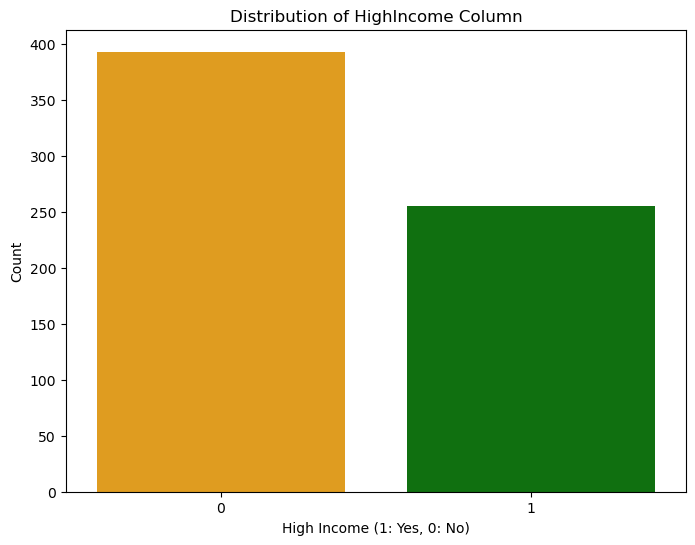

In [28]:
# visualize the distribution of HighIncome column

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='HighIncome', palette={0: 'orange', 1: 'green'})
plt.title('Distribution of HighIncome Column')
plt.xlabel('High Income (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

In [29]:
# impute missing values in GDP, GDPGrowth, InflationRate, and InflationPercent columns using KNNImputer

columns_to_impute = ['GDP', 'GDPGrowth', 'InflationRate']
knn_imputer = KNNImputer(n_neighbors=5)
df[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])
print(df[columns_to_impute].isna().sum())

GDP              0
GDPGrowth        0
InflationRate    0
dtype: int64


In [30]:
# remove outliners in GDP, GDPGrowth, InflationRate, and InflationPercent columns

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_check = ['GDP', 'GDPGrowth', 'InflationRate']
df_cleaned = remove_outliers(df, columns_to_check)
print(df_cleaned[columns_to_check].describe())

                GDP   GDPGrowth  InflationRate
count  5.060000e+02  506.000000     506.000000
mean   1.378115e+11    4.286343       7.194557
std    1.934079e+11    2.798966       6.199670
min    5.906598e+07   -3.640426     -10.801423
25%    8.456790e+09    2.496388       3.070878
50%    3.181810e+10    4.392909       6.086926
75%    2.235000e+11    5.844407      11.165758
max    8.850000e+11   11.920637      26.993834


In [31]:
# see the shape

df.shape

(648, 22)